# 海伦约会

In [3]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt

def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    lables = ['爱情片','爱情片','动作片','动作片']
    return group,lables

In [4]:
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]

group,labels = createDataSet()
a = classify0([0,0],group,labels,3)
print(a)


动作片


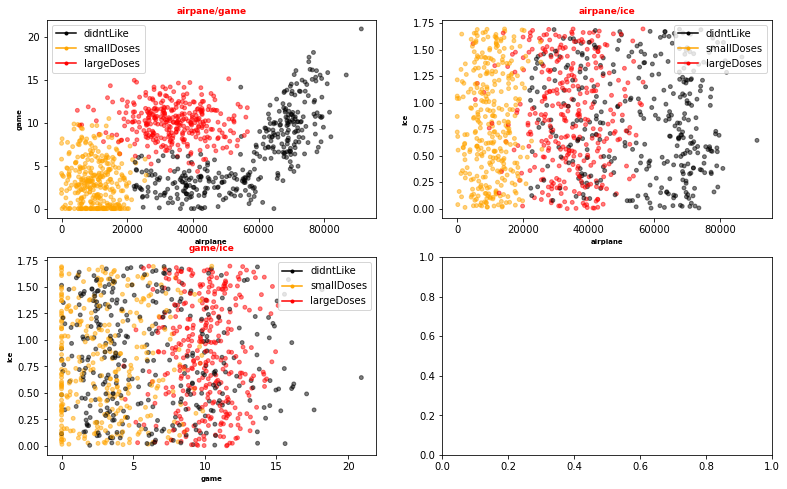

In [5]:
import matplotlib.lines as mlines
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        if listFromLine[-1]=='didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1]=='smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1]=='largeDoses':
            classLabelVector.append(3)
        index+=1
    return returnMat,classLabelVector

def showDatas(datingDataMat,datingLabels):
    fig,axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))
    numberOfLabels = len(datingLabels)
    labelsColor=[]
    for i in datingLabels:
        if i ==1:
            labelsColor.append('black')
        if i ==2:
            labelsColor.append('orange')
        if i ==3:
            labelsColor.append('red')
    
    axs[0][0].scatter(x=datingDataMat[:,0],y=datingDataMat[:,1],color=labelsColor,s=15,alpha=.5)
    axs0_title_text = axs[0][0].set_title(u'airpane/game')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'airplane')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'game')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    
    axs[0][1].scatter(x=datingDataMat[:,0],y=datingDataMat[:,2],color=labelsColor,s=15,alpha=.5)
    axs0_title_text = axs[0][1].set_title(u'airpane/ice')
    axs0_xlabel_text = axs[0][1].set_xlabel(u'airplane')
    axs0_ylabel_text = axs[0][1].set_ylabel(u'ice')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    
    axs[1][0].scatter(x=datingDataMat[:,1],y=datingDataMat[:,2],color=labelsColor,s=15,alpha=.5)
    axs0_title_text = axs[1][0].set_title(u'game/ice')
    axs0_xlabel_text = axs[1][0].set_xlabel(u'game')
    axs0_ylabel_text = axs[1][0].set_ylabel(u'ice')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
    
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    
    plt.show()
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
showDatas(datingDataMat,datingLabels)

In [6]:
'''
函数说明：数据归一化
'''
# import pdb
# pdb.set_trace()
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals-minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals
normMat,ranges,minVals = autoNorm(datingDataMat)


In [7]:
'''
函数说明：针对约会网站的测试代码
'''

def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]#normMat的长度,即为数据总量
    numTestVecs = int(m*hoRatio)#测试集数据总量——100
    errCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i], normMat[numTestVecs:m], datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, ther real answer is: %d" %(classifierResult,datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errCount += 1.0
    print("the total error rate is : %f" % (errCount/float(numTestVecs)))

datingClassTest()

the classifier came back with: 3, ther real answer is: 3
the classifier came back with: 2, ther real answer is: 2
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 3, ther real answer is: 3
the classifier came back with: 3, ther real answer is: 3
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 3, ther real answer is: 3
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 2, ther real answer is: 2
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 1, ther real answer is: 1
the classifier came back with: 

In [8]:
'''
函数说明：根据输入指标预测海伦的偏好程度
'''

def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input('玩游戏时间占比：'))
    ffMiles = float(input('每年飞行里程数：'))
    iceCream = float(input('每年冰淇淋消费（升）：'))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat,ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print('海伦可能%s此人：',resultList[classifierResult-1])
   

# 手写数字识别

In [9]:
import numpy as np
import operator
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as kNN

def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect
testVector = img2vector('dataSet/testDigits/0_13.txt')


In [69]:
'''
函数说明：采用KNN算法进行手写数字识别
'''

def handwritingClassTest():
    hwLabels = []#训练集中每个数据的标记
    trainingFileList = listdir('dataSet/trainingDigits/')
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))#1*1024的数据向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('dataSet/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('dataSet/testDigits/')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('dataSet/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        print("分类器预测结果是：%d，真实结果是：%d" %(classifierResult,classNumStr))
        if classifierResult!=classNumStr:
            errorCount+=1.0
    print('预测错误总数为：%d' % errorCount)
    print('错误率为：%f' % (errorCount/float(mTest)))
    
handwritingClassTest()

分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：9，真实结果是：9
分类器预测结果是：0，真实结果是：0
分类器预测结果是：0，真实结果是：0
分类器预测结果是：9，真实结果是：9
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：0，真实结果是：0
分类器预测结果是：3，真实结果是：3
分类器预测结果是：2，真实结果是：2
分类器预测结果是：2，真实结果是：2
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：6，真实结果是：6
分类器预测结果是：6，真实结果是：6
分类器预测结果是：9，真实结果是：9
分类器预测结果是：8，真实结果是：8
分类器预测结果是：1，真实结果是：8
分类器预测结果是：1，真实结果是：1
分类器预测结果是：8，真实结果是：8
分类器预测结果是：1，真实结果是：1
分类器预测结果是：3，真实结果是：8
分类器预测结果是：9，真实结果是：9
分类器预测结果是：6，真实结果是：6
分类器预测结果是：6，真实结果是：6
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：2，真实结果是：2
分类器预测结果是：9，真实结果是：9
分类器预测结果是：3，真实结果是：3
分类器预测结果是：0，真实结果是：0
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：0，真实结果是：0
分类器预测结果是：9，真实结果是：9
分类器预测结果是：9，真实结果是：9
分类器预测结果是：0，真实结果是：0
分类器预测结果是：3，真实结果是：3
分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：1，真实结果是：1
分类器预测结果是：9，真

分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：3，真实结果是：3
分类器预测结果是：8，真实结果是：8
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：8，真实结果是：8
分类器预测结果是：4，真实结果是：4
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：3，真实结果是：3
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：6，真实结果是：6
分类器预测结果是：3，真实结果是：3
分类器预测结果是：0，真实结果是：0
分类器预测结果是：7，真实结果是：7
分类器预测结果是：9，真实结果是：9
分类器预测结果是：9，真实结果是：9
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：0，真实结果是：0
分类器预测结果是：4，真实结果是：4
分类器预测结果是：2，真实结果是：2
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：6，真实结果是：6
分类器预测结果是：1，真实结果是：1
分类器预测结果是：8，真实结果是：8
分类器预测结果是：6，真实结果是：6
分类器预测结果是：8，真实结果是：8
分类器预测结果是：1，真实结果是：1
分类器预测结果是：1，真实结果是：1
分类器预测结果是：8，真实结果是：8
分类器预测结果是：6，真实结果是：6
分类器预测结果是：0，真实结果是：0
分类器预测结果是：1，真实结果是：1
分类器预测结果是：1，真实结果是：1
分类器预测结果是：1，真实结果是：1
分类器预测结果是：7，真实结果是：1
分类器预测结果是：0，真实结果是：0
分类器预测结果是：1，真实结果是：1
分类器预测结果是：6，真实结果是：6
分类器预测结果是：8，真实结果是：8
分类器预测结果是：8，真实结果是：8
分类器预测结果是：1，真实结果是：1
分类器预测结果是：6，真实结果是：6
分类器预测结果是：8，真

分类器预测结果是：4，真实结果是：4
分类器预测结果是：0，真实结果是：0
分类器预测结果是：9，真实结果是：9
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：0，真实结果是：0
分类器预测结果是：9，真实结果是：9
分类器预测结果是：7，真实结果是：7
分类器预测结果是：1，真实结果是：1
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：5，真实结果是：5
分类器预测结果是：3，真实结果是：3
分类器预测结果是：3，真实结果是：3
分类器预测结果是：4，真实结果是：4
分类器预测结果是：3，真实结果是：3
分类器预测结果是：3，真实结果是：3
分类器预测结果是：4，真实结果是：4
分类器预测结果是：5，真实结果是：5
分类器预测结果是：1，真实结果是：1
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：4，真实结果是：4
分类器预测结果是：0，真实结果是：0
分类器预测结果是：9，真实结果是：9
分类器预测结果是：9，真实结果是：9
分类器预测结果是：0，真实结果是：0
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：9，真实结果是：9
分类器预测结果是：3，真实结果是：3
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：2，真实结果是：2
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：1，真实结果是：1
分类器预测结果是：1，真实结果是：1
分类器预测结果是：8，真实结果是：8
分类器预测结果是：6，真实结果是：6
分类器预测结果是：7，真实结果是：7
分类器预测结果是：7，真实结果是：7
分类器预测结果是：6，真实结果是：6
分类器预测结果是：1，真实结果是：1
分类器预测结果是：8，真实结果是：8
分类器预测结果是：1，真实结果是：1
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：5，真实结果是：5
分类器预测结果是：2，真实结果是：2
分类器预测结果是：2，真

In [72]:
'''
函数说明：基于Scikit-learn的手写数字识别。用封装的KNN算法
'''

def handwritingClassTestBySK():
    #测试集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('dataSet/trainingDigits/')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,测试集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('dataSet/trainingDigits/%s' % (fileNameStr))
    #构建kNN分类器
    neigh = kNN(n_neighbors = 3, algorithm = 'auto')
    #拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    #返回testDigits目录下的文件列表
    testFileList = listdir('dataSet/testDigits/')
    #错误检测计数
    errorCount = 0.0
    #测试数据的数量
    mTest = len(testFileList)
    #从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        #获得文件的名字
        fileNameStr = testFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('dataSet/testDigits/%s' % (fileNameStr))
        #获得预测结果
        # classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        classifierResult = neigh.predict(vectorUnderTest)
        print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))
    
handwritingClassTestBySK()

分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为9	真实结果为9
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为3	真实结果为8
分类返回结果为9	真实结果为9
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2	真实结果为2
分类返回结果为9	真实结果为9
分类返回结果为3	真实结果为3
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为1	真实结果为1
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为7	真实结果为7
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为2

分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为4	真实结果为4
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为0	真实结果为0
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为1	真实结果为1
分类返回结果为0	真实结果为0
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为8	真实结果为8
分类返回结果为8	真实结果为8
分类返回结果为1	真实结果为1
分类返回结果为6	真实结果为6
分类返回结果为6	真实结果为6
分类返回结果为2	真实结果为2
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为4	真实结果为4
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为3	真实结果为3
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为4	真实结果为4
分类返回结果为3	真实结果为3
分类返回结果为6	真实结果为6
分类返回结果为7	真实结果为7
分类返回结果为7	真实结果为7
分类返回结果为9	真实结果为9
分类返回结果为0	真实结果为0
分类返回结果为9	真实结果为9
分类返回结果为4	真实结果为4
分类返回结果为5	真实结果为5
分类返回结果为5	真实结果为5
分类返回结果为2	真实结果为2
分类返回结果为2